# K-Nearest Neighbors - Clasificación

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

#### Cómo funciona
<div>
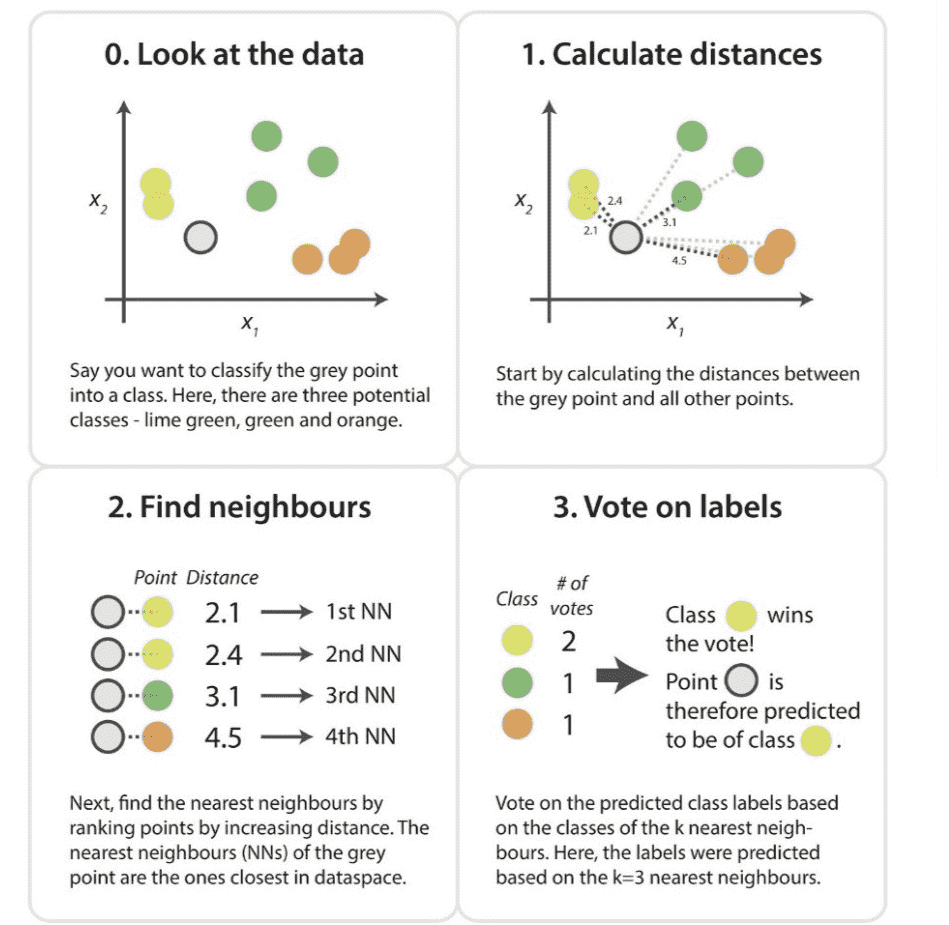
</div>

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv("../data/2008_small.zip",nrows=100000)

>Seleccionaremos 4 columnas que vamos a usar como predictoras!

In [78]:
newdf = df[["AirTime","Distance","TaxiOut","ArrDelay"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

In [79]:
cols

,AirTime,Distance,TaxiOut
0,69.0,431,78.0
1,246.0,1848,9.0
2,89.0,641,11.0
3,219.0,1557,27.0
4,64.0,412,12.0
...,...,...,...
99995,30.0,134,12.0
99996,131.0,936,14.0
99997,36.0,201,12.0
99998,221.0,1721,10.0


>Y nos generaremos una columna respuesta categórica...

In [80]:
filtro = newdf["ArrDelay"] > 10 

In [81]:
newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro== False] = "Not Delayed"

In [82]:
newdf

,AirTime,Distance,TaxiOut,ArrDelay
0,69.0,431,78.0,Delayed
1,246.0,1848,9.0,Delayed
2,89.0,641,11.0,Not Delayed
3,219.0,1557,27.0,Not Delayed
4,64.0,412,12.0,Not Delayed
...,...,...,...,...
99995,30.0,134,12.0,Delayed
99996,131.0,936,14.0,Not Delayed
99997,36.0,201,12.0,Not Delayed
99998,221.0,1721,10.0,Delayed


>Ajustamos el modelo

In [ ]:
nbrs_3 = KNeighborsClassifier(n_neighbors=3)
nbrs_3.get_params()

In [ ]:
nbrs_3.fit(cols,newdf["ArrDelay"]) # Entrenar

In [ ]:
predicciones_3 = nbrs_3.predict(cols) # Le he pedido predicciones

In [ ]:
predicciones_3

In [ ]:
np.mean(predicciones_3 == newdf["ArrDelay"])

In [ ]:
newdf["ArrDelay"].value_counts()/len(newdf["ArrDelay"])

In [ ]:
np.mean(predicciones_3 == newdf["ArrDelay"]) # Precisión / Accuracy

>Probamos con distintas k...

In [ ]:
nbrs_1 = KNeighborsClassifier(n_neighbors=10)
nbrs_1.fit(cols,newdf["ArrDelay"])
predicciones_1 = nbrs_1.predict(cols)
np.mean(predicciones_1 == newdf["ArrDelay"])

>Comparemos los resultados con la predicción más simple que podemos hacer... la media.

In [ ]:
np.mean(newdf["ArrDelay"] == "Not Delayed")

### Visualización de resultados de clasificación

**Matriz de confusión:**
Cada fila en una matriz de confusión representa una clase real, mientras que cada columna representa una clase predicha.
<div style="padding:0; margin:0;">
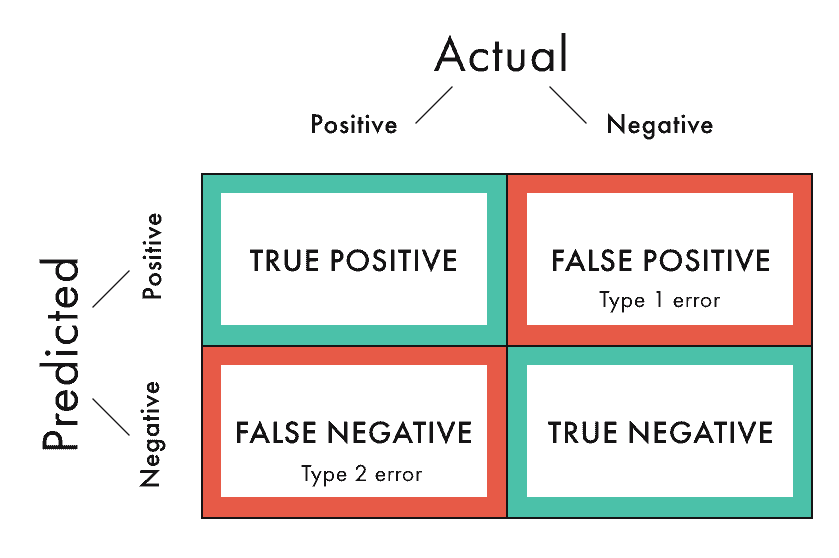
</div>

- precision = (TP) / (TP+FP)

- recall = (TP) / (TP+FN) # Exhaustividad


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(newdf["ArrDelay"],predicciones_1)
print(confusion)

In [ ]:
import seaborn as sns
sns.heatmap( confusion, annot=True,fmt='.6g',
            xticklabels= nbrs_1.classes_, 
            yticklabels=nbrs_1.classes_)

>¿Y para convertirla a porcentaje?

In [ ]:
confusion / np.sum(confusion)

In [ ]:
sns.heatmap( np.round(confusion / np.sum(confusion) * 100,2), annot=True,fmt='.6g',
            xticklabels= ["Delayed","Not Delayed"], 
            yticklabels=["Delayed","Not Delayed"]
           )

In [ ]:
TP=confusion[0][0]
FP=confusion[0][1]
FN=confusion[1][1]

precision = TP/ (TP+FP)
recall = TP/ (TP+FN)

precision, recall

## Introducción a la selección de hiper parámetros

>**Hiperparámetros**
>
>Los hiperparámetros son parámetros cuyos valores **controlan el proceso de aprendizaje y determinan los valores de los parámetros del modelo** que termina aprendiendo un algoritmo de aprendizaje.

A continuación, vamos a ver un ejemplo de como seleccionar los parámetros usando bucles. Más adelante podremos ver maneras alternativas, pero es importante tener control manual sobre estos procesos.

In [ ]:
newdf = df[["AirTime","Distance","TaxiOut","TaxiIn","ArrDelay"]].dropna()
filtro = newdf["ArrDelay"] > 10 

cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro== False] = "Not Delayed"

In [ ]:
listaparametros = list(range(1,16))
listaprecision = []

for i in range(0,len(listaparametros)):
    clasificador = KNeighborsClassifier(n_neighbors=listaparametros[i])
    clasificador.fit(cols,newdf["ArrDelay"])
    predicciones = clasificador.predict(cols)
    listaprecision.append(np.mean(predicciones == newdf["ArrDelay"]))
    
    print("k=",listaparametros[i],"Precision:",listaprecision[i])


### Ejercicios KNN

1. Ajusta un modelo de KNN para los datos "iris". Qué columnas usaremos para clasificar y cuál va a ser la respuesta?

**(Intenta hacerlo usando validación externa!)**

2. Muestra los datos gráficamente

3. Prueba si es más productivo hacerlo con los datos escalados con media 0 y desviación 1 o con los datos originales.

4. Te animas a generar un bucle que permita escoger qué "k" es más favorable para estos datos?

5. Crea una matriz de confusión con los datos

6. (Extra) Representar gráficamente (nube de puntos) cuáles son los valores mal clasificados.

# Árboles de Clasificación

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

#### Cómo funciona
<div>
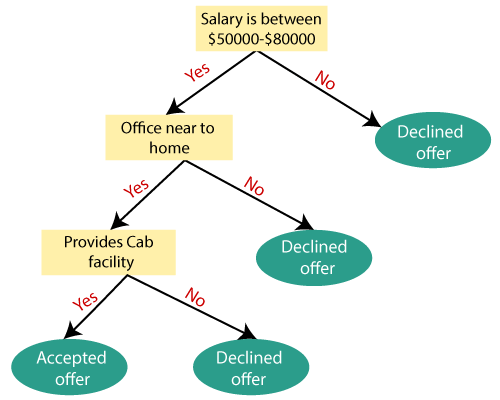
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cols, newdf["ArrDelay"], test_size=.2)

In [ ]:
y_train

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
np.mean(predictions == y_test)

In [ ]:
y_train.value_counts() / len(y_train)

### validación interna de un árbol

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(cols,newdf["ArrDelay"])
predictions = clf.predict(cols)
np.mean(predictions == newdf["ArrDelay"])

>Ajustes de parámetros manuales

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split = 0.005,  
                                  #class_weight = "balanced",
                                  max_features=2)
clf.fit(X_train,y_train)

# Evaluación externa
predictions = clf.predict(X_test)
np.mean(predictions == y_test)

In [ ]:
y_train, y_test

In [83]:
cols

,AirTime,Distance,TaxiOut
0,69.0,431,78.0
1,246.0,1848,9.0
2,89.0,641,11.0
3,219.0,1557,27.0
4,64.0,412,12.0
...,...,...,...
99995,30.0,134,12.0
99996,131.0,936,14.0
99997,36.0,201,12.0
99998,221.0,1721,10.0


In [84]:
newdf["ArrDelay"]

0            Delayed
1            Delayed
2        Not Delayed
3        Not Delayed
4        Not Delayed
            ...     
99995        Delayed
99996    Not Delayed
99997    Not Delayed
99998        Delayed
99999    Not Delayed
Name: ArrDelay, Length: 97801, dtype: object

In [106]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

clf = tree.DecisionTreeClassifier(min_samples_split=0.1)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv_results = cross_validate(clf, cols, newdf["ArrDelay"], cv=cv, scoring="accuracy",return_train_score=True)
cv_results

{'fit_time': array([0.4009645 , 0.87283301, 0.46022463, 0.51882219, 0.62378716]),
 'score_time': array([0.08455276, 0.12107682, 0.09604645, 0.09726167, 0.10087514]),
 'test_score': array([0.6648376 , 0.66357657, 0.66473535, 0.6648376 , 0.66739375]),
 'train_score': array([0.97236342, 0.97195443, 0.97223196, 0.97229039, 0.97294771])}

In [109]:
import pandas as pd

cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score,train_score
0,0.400964,0.084553,0.664838,0.972363
1,0.872833,0.121077,0.663577,0.971954
2,0.460225,0.096046,0.664735,0.972232
3,0.518822,0.097262,0.664838,0.972290
4,0.623787,0.100875,0.667394,0.972948


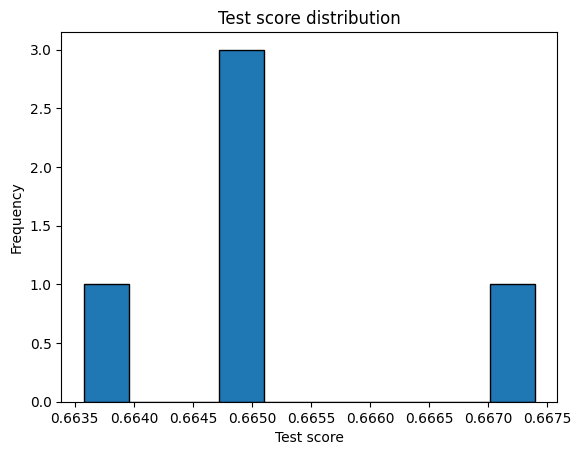

In [110]:
import matplotlib.pyplot as plt

cv_results["test_score"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Test score")
_ = plt.title("Test score distribution")

In [112]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = cv_results[
    ["train_score", "test_score"]]

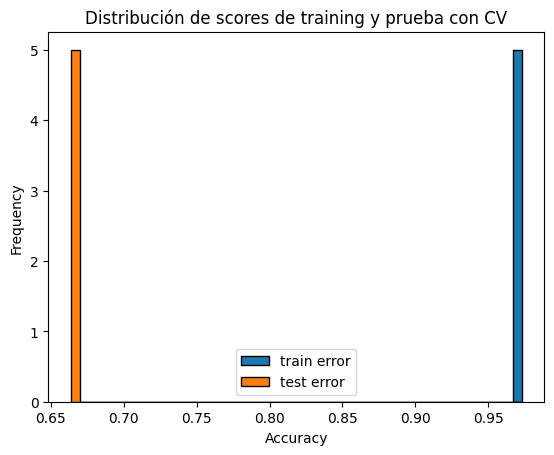

In [113]:
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Accuracy")
_ = plt.title("Distribución de scores de training y prueba con CV")

### Visualizando el árbol

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(figsize=(18, 16))
_ = plot_tree(clf, feature_names=cols.columns,
              class_names=clf.classes_, impurity=False, ax=ax)

In [ ]:
confusion = confusion_matrix(y_test, predictions)
confusion

In [ ]:
TP=confusion[0][0]
FP=confusion[0][1]
FN=confusion[1][1]

precision = TP/ (TP+FP)
recall = TP/ (TP+FN)

precision, recall

### Ejercicios Árboles

1. Ajusta un modelo de árbol para los datos "iris".

2. Muestra los datos gráficamente como consideres, y representa el árbol de decisiones

3. Te animas a generar un bucle que permita escoger qué combinaciones de parámetros son más favorables para estos datos?

4. Crea una matriz de confusión con los datos

5. Explora otras opciones de evaluación de los modelos

https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587

6. Implementa alguna de las soluciones

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.